***

This dataset from Kaggle contains information about various restaurants and aims to predict the revenue based on a number of features. 
Each row represents a unique restaurant with various attributes that may influence its revenue.  We have a total of 8368 restaurants in
the study.  

## Features

* Name: The name of the restaurant.
* Location: The location of the restaurant (e.g., Rural, Downtown).
* Cuisine: The type of cuisine offered (e.g., Japanese, Mexican, Italian).
* Rating: The average rating of the restaurant.
* Seating Capacity: The number of seats available in the restaurant.
* Average Meal Price: The average price of a meal at the restaurant.
* Marketing Budget: The marketing budget allocated for the restaurant.
* Social Media Followers: The number of social media followers.
* Chef Experience Years: The number of years of experience of the head chef.
* Number of Reviews: The total number of reviews the restaurant has received.
* Avg Review Length: The average length of reviews.
* Ambience Score: A score representing the ambience of the restaurant.
* Service Quality Score: A score representing the quality of service.
* Parking Availability: Indicates if parking is available (Yes/No).
* Weekend Reservations: The number of reservations made on weekends.
* Weekday Reservations: The number of reservations made on weekdays.
* Revenue: The total revenue generated by the restaurant. 

The purpose of this analysis is to get a better understanding of the features that most impact revenue.  

Here is a link to the dataset:

https://www.kaggle.com/datasets/anthonytherrien/restaurant-revenue-prediction-dataset

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Bring in the data 
revenue = pd.read_csv('restaurant_data.csv')
revenue

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [3]:
#Note that Location, Cuisine, and Parking Availability are all currently objects.  We will need to encode these as integer variables.  

revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [4]:
revenue.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [5]:
revenue.isna().sum()

#There are no missing values in the data 

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [6]:
#Number of Unique Values for location 

revenue["Location"].unique()

#There are three unique values for location: Rural, Downtown, Suburban  

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [7]:
revenue["Location"].value_counts()

#The locations are evenly distributed.  

Location
Downtown    2821
Suburban    2785
Rural       2762
Name: count, dtype: int64

In [8]:
revenue["Cuisine"].unique()

#There are six types of cusine represented:  Japanese, Mexican, Italian, Indian, French, American

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [9]:
revenue["Cuisine"].value_counts()

#These six cuisines are roughly evenly represented.  

Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64

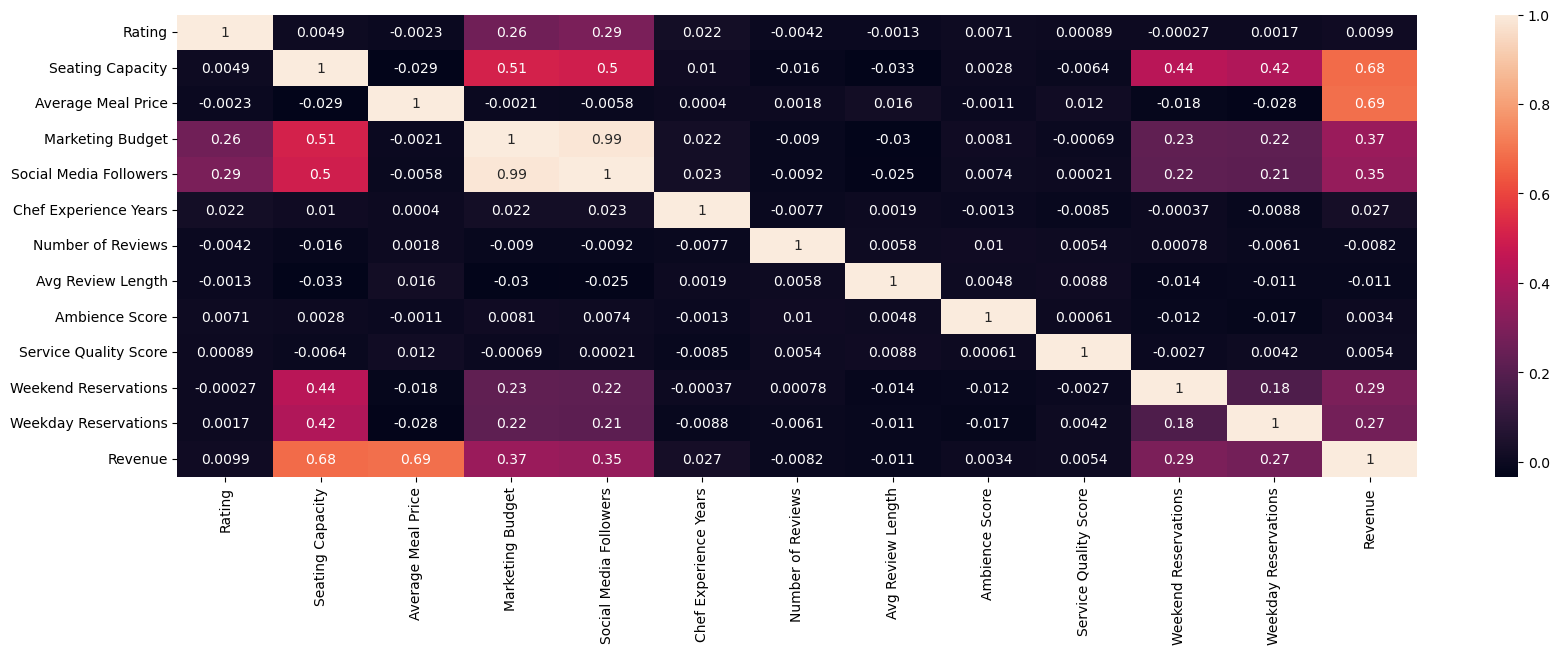

In [10]:
#Let's take a look at the correlations with the numeric variables. 

plt.figure(figsize=(20,6))

sns.heatmap(revenue.corr(numeric_only=True), annot=
           True);

#The two highest correlations with Revenue are Seating Capacity and Average Meal Price.  

#Marketing Budget and Number of Social Media followers have some relationship to Revenue.  

#It is interesting that service quality score has no relationship to Revenue.  

In [11]:
#We now rank the types of cuisines by their social media following from highest to lowest. 

highestsocialmediafollowing = revenue.groupby('Cuisine')['Social Media Followers'].mean().sort_values(ascending=False)
highestsocialmediafollowing

Cuisine
American    36616.777542
Italian     36594.110403
Indian      36109.148283
Mexican     35980.157215
French      35918.327285
Japanese    35908.885417
Name: Social Media Followers, dtype: float64

In [12]:
#While American and Italian cuisines have the highest amount of social media following, the range
#among the six cuisines is fairly small.  

In [13]:
PercentofReservationsonWeekend =  ((revenue["Weekend Reservations"])/ (revenue["Weekend Reservations"] + revenue["Weekday Reservations"])).mean()

In [14]:
PercentofReservationsonWeekend

#Half the reservations booked were on the weekends with the other half on the weekdays.  

0.5016023967747216

In [15]:
#Which cuisine is rated the highest?  

highestrating =revenue.groupby('Cuisine')['Rating'].mean().nlargest(6)
highestrating

#All the cuisine ratings are similar.  

Cuisine
Mexican     4.016798
Italian     4.014650
Indian      4.012856
Japanese    4.012574
French      4.000977
American    3.992302
Name: Rating, dtype: float64

In [16]:
#Let's look at the revenue data in more detail.  

In [17]:
#Produce value_counts of revenue by location

revenue.groupby("Location")["Revenue"].mean().sort_values(ascending=False)

#We see that the mean of revenue is highest in the Downtown location.  

Location
Downtown    866582.166707
Suburban    647049.702747
Rural       450158.131676
Name: Revenue, dtype: float64

In [18]:
revenue.groupby("Cuisine")["Revenue"].mean().sort_values(ascending=False)

#Japanese cuisine has the highest mean revenue while Mexican has the lowest.  


Cuisine
Japanese    937969.038810
French      820204.107132
Italian     692742.385796
American    564942.031518
Indian      496615.723944
Mexican     427383.895621
Name: Revenue, dtype: float64

In [19]:
revenue.groupby("Cuisine")["Average Meal Price"].mean().sort_values(ascending=False)

#Japanese cuisine also has the highest Average Meal Price while Mexican has the lowest.  


Cuisine
Japanese    70.444420
French      60.543008
Italian     50.345173
American    40.454527
Indian      35.492330
Mexican     30.404501
Name: Average Meal Price, dtype: float64

In [20]:
#Is Parking availability related to location?  We built a crosstab to find out. 

pd.crosstab(revenue['Parking Availability'], revenue['Location'])

#The crosstab shows the same distribution irregardless of location.  

Location,Downtown,Rural,Suburban
Parking Availability,,,
No,1395,1383,1401
Yes,1426,1379,1384


In [21]:
#Are there differnces in types of cuisine with respect to location?  We built a crosstab to find out. 

pd.crosstab(revenue['Cuisine'], revenue['Location'])

#Regardless of the location you are in, the counts of the types of cuisine look similar.   

Location,Downtown,Rural,Suburban
Cuisine,,,
American,494,443,479
French,482,499,452
Indian,449,431,489
Italian,481,464,468
Japanese,433,485,426
Mexican,482,440,471


<Axes: xlabel='Seating Capacity', ylabel='Revenue'>

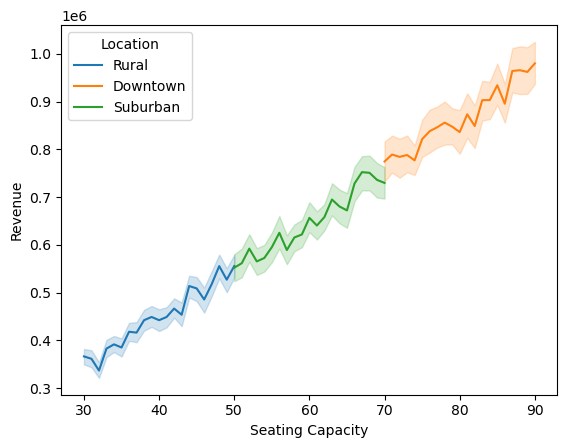

In [22]:
#We want to look at the relationship between seating capacity vs: revenue at each location 

sns.lineplot(x='Seating Capacity', y='Revenue', hue='Location', data=revenue)

#We see above that there is a positive relationship between seating capacity and revenue regardless of 
#the location.  

<Axes: xlabel='Rating', ylabel='Revenue'>

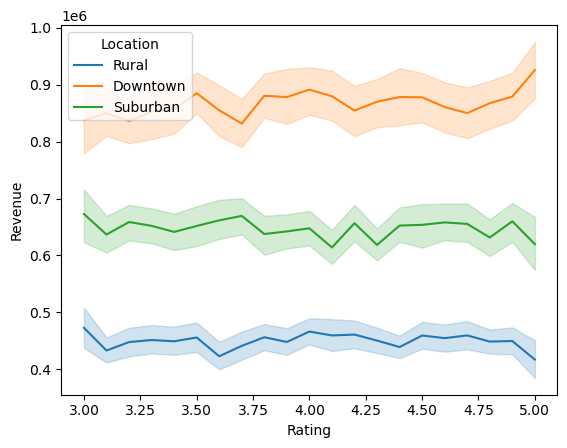

In [23]:
#Let's look at the relationship between Rating and revenue by location 

sns.lineplot(x='Rating', y='Revenue', hue='Location', data=revenue)

#No matter the location, we see no relationship between revenue and rating. 

#We also see that revenue is highest for the downtown region.  

<Axes: xlabel='Ambience Score', ylabel='Revenue'>

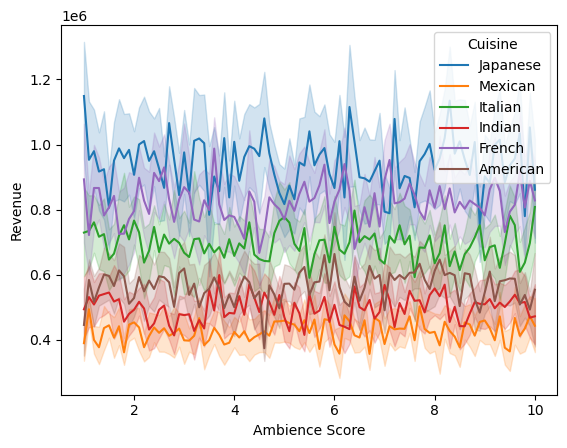

In [24]:
#We look at the relationship between Ambience Score and revenue for each type of cuisine.  

sns.lineplot(x='Ambience Score', y='Revenue', hue='Cuisine', data=revenue)

#No matter the cuisine, we see no relationship between Ambience score and revenue. 

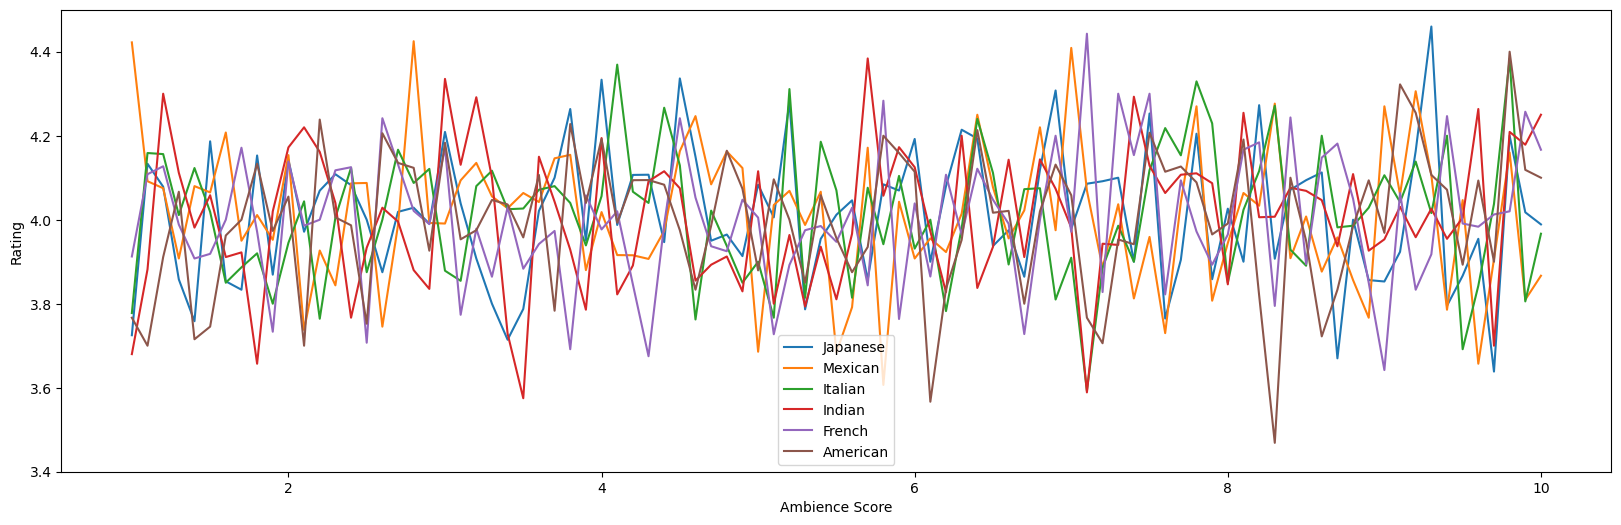

In [25]:
#We now look at the relationship between ambience score and rating at each location 

plt.figure(figsize=(20,6))


sns.lineplot(x='Ambience Score', y='Rating', hue='Cuisine', errorbar=None, data=revenue)

plt.ylim(3.4, 4.5)

plt.legend(loc='lower center')

#No matter the cuisine, we see no relationship between Ambience score and revenue. 

<Axes: xlabel='Ambience Score', ylabel='Revenue'>

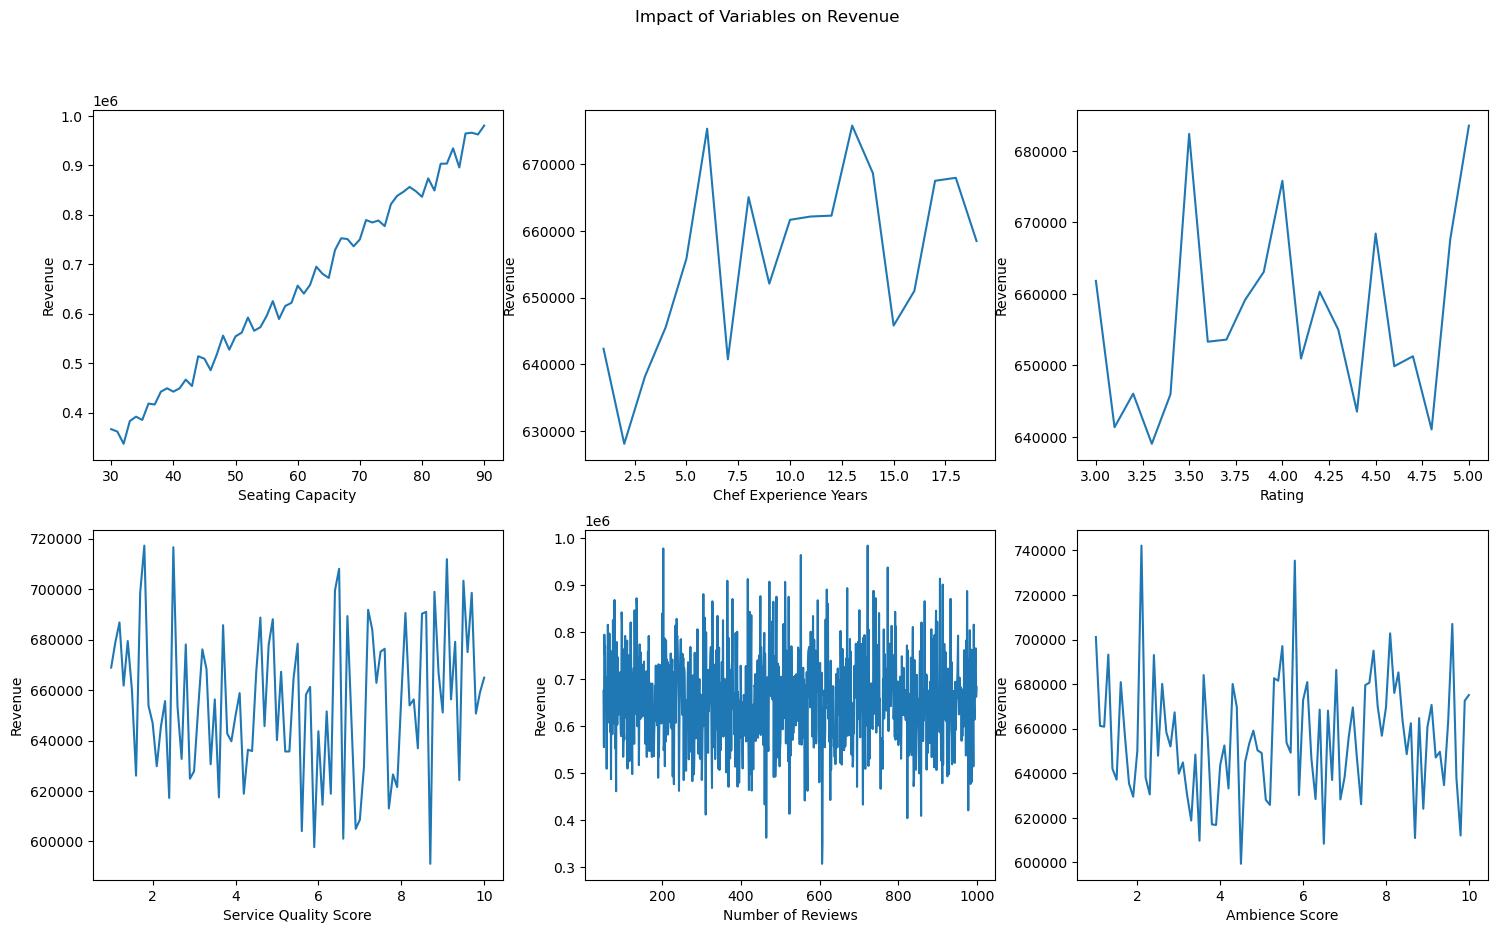

In [26]:
#We wanted to look at pairwise relationships between multiple relevant variables and revenue.  

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Impact of Variables on Revenue')

sns.lineplot(ax=axes[0, 0], data=revenue, x='Seating Capacity', y='Revenue', errorbar=None)
sns.lineplot(ax=axes[0, 1], data=revenue, x='Chef Experience Years', y='Revenue', errorbar=None)
sns.lineplot(ax=axes[0, 2], data=revenue, x='Rating', y='Revenue', errorbar=None)
sns.lineplot(ax=axes[1, 0], data=revenue, x='Service Quality Score', y='Revenue', errorbar=None)
sns.lineplot(ax=axes[1, 1], data=revenue, x='Number of Reviews', y='Revenue', errorbar=None)
sns.lineplot(ax=axes[1, 2], data=revenue, x='Ambience Score', y='Revenue', errorbar=None)

#We see here that seating capacity has a clear positive relationship with revenue.  

#The other variables (with revenue) oscillate and have no clear relationship.  

In [27]:
revenue2 = revenue.copy()

In [28]:
#In order to produce a heat map of categorical variables too, we transform three categorical variables into numeric dummy variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
revenue2['Location'] = le.fit_transform(revenue2['Location'])
revenue2['Cuisine'] = le.fit_transform(revenue2['Cuisine'])
revenue2['Parking Availability'] = le.fit_transform(revenue2['Parking Availability'])

#These varaibles appear as integers after the completion of the above step.  

In [29]:
revenue2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   int32  
 2   Cuisine                 8368 non-null   int32  
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   int32  
 14  Weekend Reservations    8368 non-null   

In [30]:
revenue2["Parking Availability"].value_counts()

Parking Availability
1    4189
0    4179
Name: count, dtype: int64

In [31]:
revenue2["Location"].unique()

array([1, 0, 2])

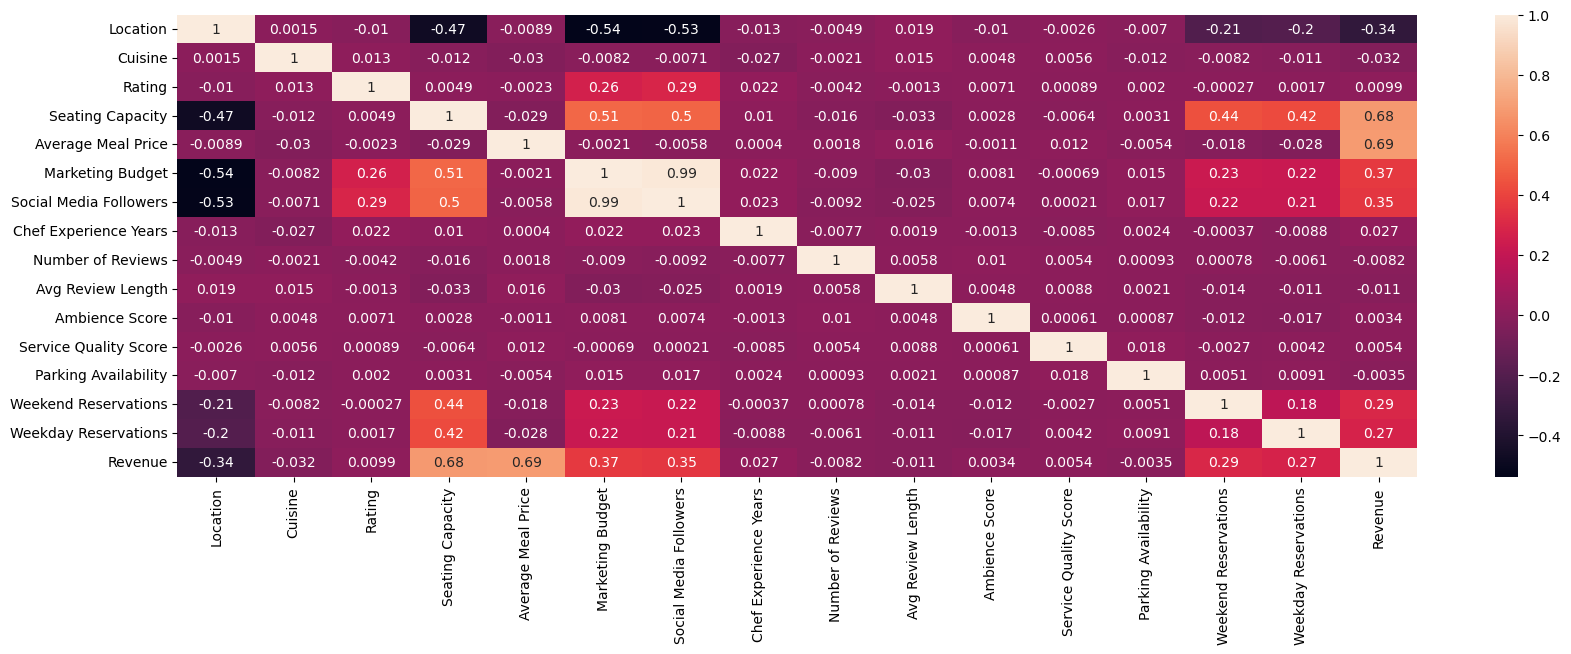

In [32]:
plt.figure(figsize=(20,6))

sns.heatmap(revenue2.corr(numeric_only=True), annot=
           True);

#We see here again that seating capacity and average meal price are  the two variables 
#most corrrelated with revenue.  


In [33]:
revenue4=revenue2.copy()

In [34]:
#We drop Name as a variable because it is not useful.  

revenue4=revenue4.drop('Name', axis=1)

In [35]:
revenue4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                8368 non-null   int32  
 1   Cuisine                 8368 non-null   int32  
 2   Rating                  8368 non-null   float64
 3   Seating Capacity        8368 non-null   int64  
 4   Average Meal Price      8368 non-null   float64
 5   Marketing Budget        8368 non-null   int64  
 6   Social Media Followers  8368 non-null   int64  
 7   Chef Experience Years   8368 non-null   int64  
 8   Number of Reviews       8368 non-null   int64  
 9   Avg Review Length       8368 non-null   float64
 10  Ambience Score          8368 non-null   float64
 11  Service Quality Score   8368 non-null   float64
 12  Parking Availability    8368 non-null   int32  
 13  Weekend Reservations    8368 non-null   int64  
 14  Weekday Reservations    8368 non-null   

In [36]:

#Create a feature set and a response set to begin to look at some models
  
from sklearn.model_selection import train_test_split


# create X (features) and y (response)
X = revenue4.loc[:, revenue4.columns!='Revenue']
y = revenue4.loc[:, revenue4.columns=='Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 





In [37]:
#import xgboost as xgb

In [38]:
#from sklearn.tree import DecisionTreeClassifier

In [39]:
#dTree_clf = DecisionTreeClassifier()

In [40]:
X_train.shape

(6276, 15)

In [41]:
y_train.shape

(6276, 1)

In [42]:
X_test.shape

(2092, 15)

In [43]:
#Because our variables have different scales, we import a package for standardized scaling 
#before we create our decision tree and random forest models.  

from sklearn.preprocessing import StandardScaler

In [44]:
#We need to standardize our data due to the fact that the scales for each variable are different.  
scaler = StandardScaler()

In [45]:
#We fit the scaler passing to the training data and return it to a variable named "train_scaled"
train_scaled = scaler.fit_transform(X_train)

In [46]:
#We then do the same for the test data
test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
#Instantiate the two models: Decision Tree and Random Forest
rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
tree_model = DecisionTreeRegressor()
#rf_model = RandomForestRegressor()

In [49]:
#Fit both models to the training data
tree_model.fit(train_scaled, y_train.values.ravel())
rf_model.fit(train_scaled, y_train.values.ravel())



RandomForestRegressor(max_depth=10, n_estimators=10, random_state=101)

In [50]:
#Load packages to find MSE and MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:
#Calculate Errors for training data
tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))

In [52]:
from math import sqrt

In [53]:
#Print errors for Decision Tree on the top line, followed by Random Forest on bottom line 
print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))

#We see here consistently that the decision tree model is better (smaller error means better)

#Looking at the mean absolute error, we see that our predictions were perfect for the decision 
#tree model but on average 4572 away from the true prediction with the random forest model. 

Decision Tree training mse =  0.0  & mae =  0.0  & rmse =  0.0
Random Forest training mse =  34789329.07671918  & mae =  4572.583859109071  & rmse =  5898.247966703263


In [54]:
#for the testing data

tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))

In [55]:
#We now calculate the same on the test data to understand how we the models are generalised.
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

Decision Tree test mse =  243856776.83704397  & mae =  12047.097447418735  & rmse =  15615.914217139001
Random Forest test mse =  91881139.94528268  & mae =  7444.792625642725  & rmse =  9585.465035421217


In [56]:
#Even though we were seeing perfect results on the training data for our decision tree model, it is actually performing worse than the random forest mode
#on our test data (roughly double the MAE).

In [57]:
#Building an XGBoost Model: A 3rd model  

from xgboost import XGBRegressor

In [58]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [59]:
#Fit the model to the training data.  

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [60]:
#Predict on the test data

predictions = model.predict(X_test)


Feature: 0, Score: 0.00215
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00010
Feature: 3, Score: 0.57124
Feature: 4, Score: 0.42314
Feature: 5, Score: 0.00033
Feature: 6, Score: 0.00034
Feature: 7, Score: 0.00123
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00025
Feature: 11, Score: 0.00024
Feature: 12, Score: 0.00010
Feature: 13, Score: 0.00023
Feature: 14, Score: 0.00024


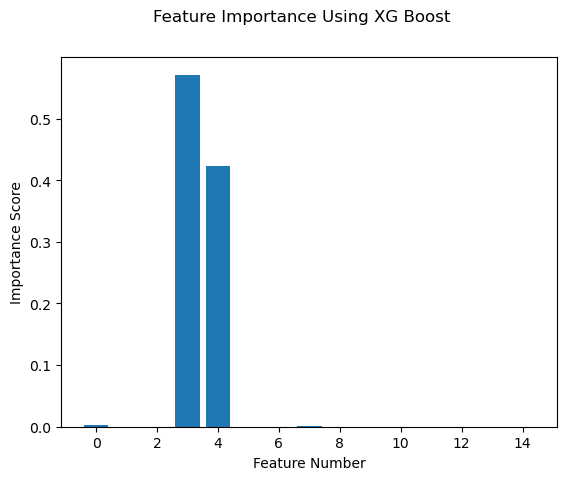

In [61]:
#for loop to see feature importance in the XGBoost model

model.fit(X, y)
# get importance for the XG Boost model
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):


 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.suptitle("Feature Importance Using XG Boost")
plt.xlabel("Feature Number")
plt.ylabel("Importance Score")
plt.show()


In [62]:
#Print the three metrics for the newly created XG Boost Model 

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

#Calculate RMSE
rmse = root_mean_squared_error(y_test, predictions)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 7112.267315965584
Mean Squared Error: 90724849.56765956
Root Mean Squared Error: 9524.959294803288


In [63]:
from sklearn.ensemble import RandomForestRegressor



In [64]:
# create X (features) and y (response)
X = revenue4.loc[:, revenue4.columns!='Revenue']
y = revenue4.loc[:, revenue4.columns=='Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X, y.values.ravel())

importance = reg.feature_importances_

In [66]:
X = revenue4.loc[:, revenue4.columns!='Revenue']
y = revenue4.loc[:, revenue4.columns=='Revenue']

In [67]:
feature_importances = reg.feature_importances_

In [68]:
feature_importances

array([4.63896866e-04, 1.11391214e-04, 9.28980124e-05, 5.08464876e-01,
       4.89733853e-01, 1.09735696e-04, 1.06874711e-04, 2.27614863e-04,
       1.10475676e-04, 1.11291439e-04, 1.12800382e-04, 1.10815301e-04,
       1.86420096e-05, 1.12820471e-04, 1.12013617e-04])

Feature: 0, Score: 0.00046
Feature: 1, Score: 0.00011
Feature: 2, Score: 0.00009
Feature: 3, Score: 0.50846
Feature: 4, Score: 0.48973
Feature: 5, Score: 0.00011
Feature: 6, Score: 0.00011
Feature: 7, Score: 0.00023
Feature: 8, Score: 0.00011
Feature: 9, Score: 0.00011
Feature: 10, Score: 0.00011
Feature: 11, Score: 0.00011
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00011
Feature: 14, Score: 0.00011


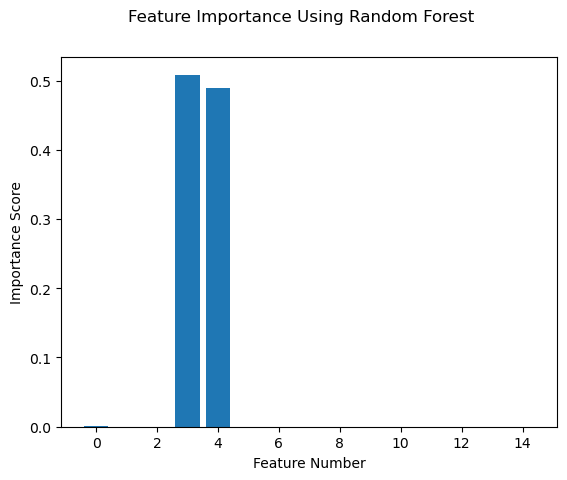

In [69]:
#feature importance in the random forest 

for i,v in enumerate(feature_importances):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.suptitle("Feature Importance Using Random Forest")
plt.xlabel("Feature Number")
plt.ylabel("Importance Score")
plt.show()

In [70]:
# No matter whether you build a Random Forest model, a decision tree model, or XG Boost, we observe that 
# seating capacity and average meal price are the two most important features in predicting revenue.  

# Summary of the Key Findings


* We see that the three locations (suburban, rural, and downtown) are evenly represented
* The six cuisines (Japanese, Mexican, Italian, Indian, French, American) are roughly evenly represented.
* The two highest correlations with Revenue are Seating Capacity and Average Meal Price.  
* Half the reservations booked were on the weekends with the other half on the weekdays.
* All the type of cuisine ratings are very similar.
* We see that the mean of revenue is highest in the Downtown location.
* Japanese cuisine has the highest mean revenue while Mexican has the lowest.
* We see that there is a positive relationship between seating capacity and revenue regardless of location.
* No matter the location, we see no relationship between revenue and rating.
* No matter whether you build a Random Forest model, a decision tree model, or XG Boost, we observe that 
  seating capacity and average meal price are the two most important features in predicting revenue.  


